In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Titanic-dataset.csv')

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

Convert categorical variables to numeric

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

Feature Engineering

In [12]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['FamilySize'] = df['SibSp'] + df['Parch']

In [13]:
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

Exploratory data analysis

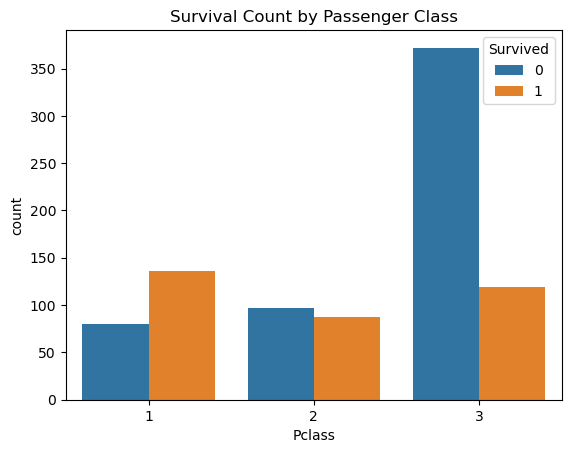

In [15]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

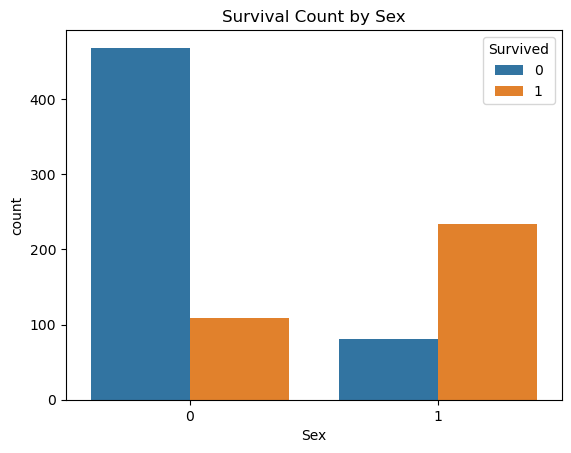

In [16]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

In [17]:
X = df.drop(columns='Survived')
y = df['Survived']

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[89 16]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



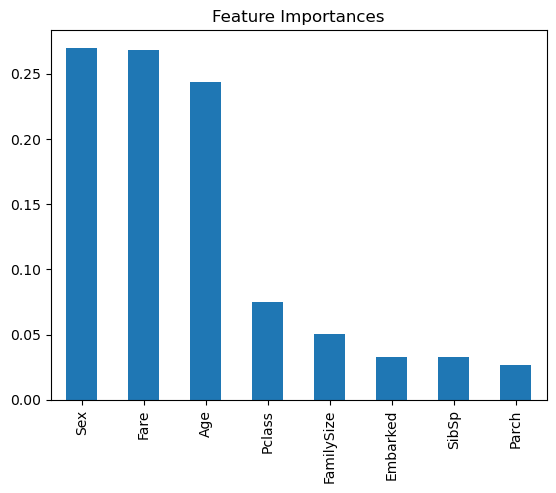

In [24]:
feature_importances = pd.Series(model.feature_importances_, index=df.drop(columns='Survived').columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

Conclusion based on model evaluation

In [25]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [26]:
conclusion_text = f"""
Conclusion of Titanic Survival Prediction Project:

1. **Objective**: The objective of this project was to predict whether a passenger on the Titanic survived or not using various features such as age, sex, passenger class, fare, and more.

2. **Data Preprocessing**:
   - Handled missing values by imputing the median for 'Age' and the mode for 'Embarked'.
   - Dropped the 'Cabin' column due to a high number of missing values.
   - Converted categorical features 'Sex' and 'Embarked' into numerical format.
   - Created a new feature 'FamilySize' to capture the total number of family members onboard.

3. **Model Used**: A Random Forest Classifier was used for its robustness and ability to handle both categorical and numerical data.

4. **Model Performance**:
   - **Accuracy**: {accuracy:.2f}
   - **Confusion Matrix**:
     - True Negatives: {conf_matrix[0, 0]}
     - False Positives: {conf_matrix[0, 1]}
     - False Negatives: {conf_matrix[1, 0]}
     - True Positives: {conf_matrix[1, 1]}
   - **Classification Report**: \n{class_report}

5. **Key Insights**:
   - The model shows reasonable accuracy, indicating that the features chosen (such as passenger class, age, and sex) are useful predictors of survival.
   - The majority of survivors were in first class and were female, which aligns with historical accounts.

6. **Limitations**:
   - The dataset has some limitations, such as missing values and limited features (e.g., no information on passengers' health or exact locations during the disaster).
   - Further improvements could be made by exploring more complex models, fine-tuning hyperparameters, or incorporating additional data.

7. **Future Work**:
   - Investigate other algorithms like Gradient Boosting or Logistic Regression to see if they improve accuracy.
   - Explore more sophisticated feature engineering, such as creating interaction terms between features or using natural language processing to analyze passenger names.

Overall, the Random Forest model provides a good baseline for predicting Titanic survival, demonstrating how machine learning can uncover patterns and insights from historical data.
"""

print(conclusion_text)


Conclusion of Titanic Survival Prediction Project:

1. **Objective**: The objective of this project was to predict whether a passenger on the Titanic survived or not using various features such as age, sex, passenger class, fare, and more.

2. **Data Preprocessing**:
   - Handled missing values by imputing the median for 'Age' and the mode for 'Embarked'.
   - Dropped the 'Cabin' column due to a high number of missing values.
   - Converted categorical features 'Sex' and 'Embarked' into numerical format.
   - Created a new feature 'FamilySize' to capture the total number of family members onboard.

3. **Model Used**: A Random Forest Classifier was used for its robustness and ability to handle both categorical and numerical data.

4. **Model Performance**:
   - **Accuracy**: 0.82
   - **Confusion Matrix**:
     - True Negatives: 89
     - False Positives: 16
     - False Negatives: 16
     - True Positives: 58
   - **Classification Report**: 
              precision    recall  f1-score